In [1]:
import sqlite3

# Connect to or create database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert sample data
cursor.executemany("""
INSERT INTO sales (product, quantity, price)
VALUES (?, ?, ?)
""", [
    ('Laptop', 5, 60000),
    ('Mobile', 15, 20000),
    ('Headphones', 20, 1500),
    ('Monitor', 7, 12000),
    ('Keyboard', 10, 1000)
])

conn.commit()
conn.close()

In [3]:
import pandas as pd
conn = sqlite3.connect("sales_data.db")
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)
print(df)
conn.close()

      product  total_qty   revenue
0  Headphones         20   30000.0
1    Keyboard         10   10000.0
2      Laptop          5  300000.0
3      Mobile         15  300000.0
4     Monitor          7   84000.0


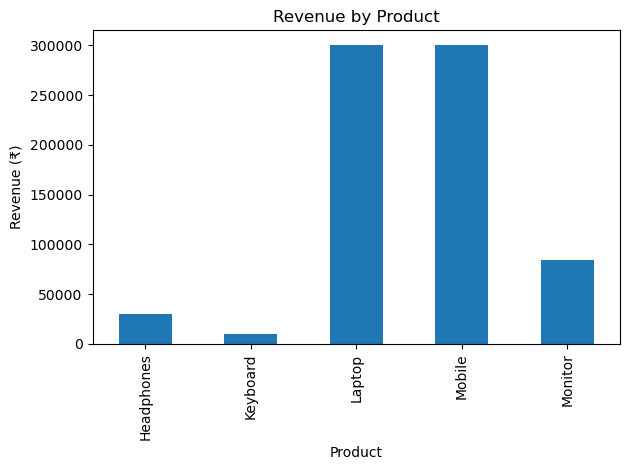

In [5]:
import matplotlib.pyplot as plt

# Plot revenue per product
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue (₹)")
plt.tight_layout()
plt.savefig("sales_chart.png")  # Optional
plt.show()